<a href="https://colab.research.google.com/github/zuritae98/proyectoDesercionEscolar/blob/main/Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

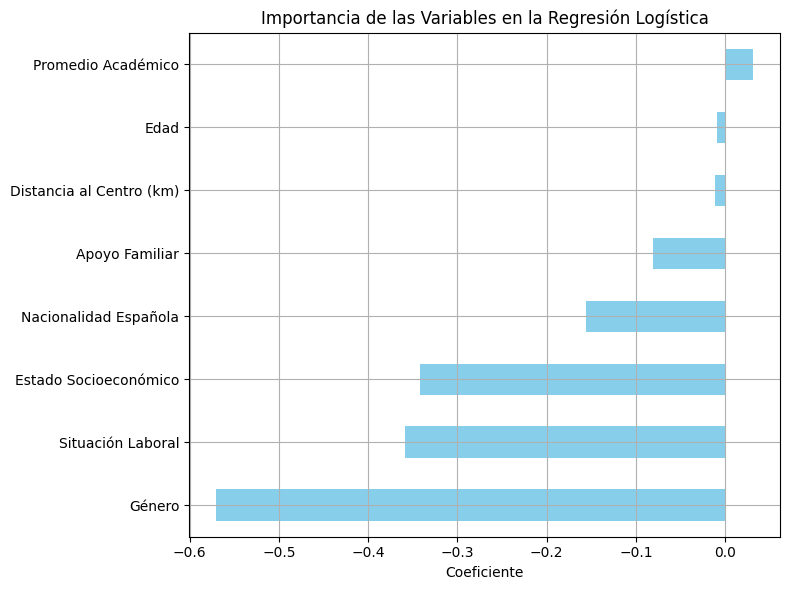

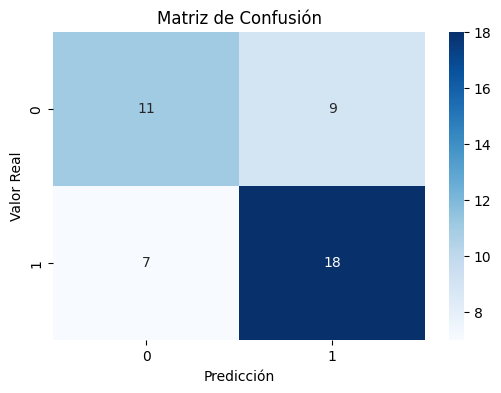

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.61      0.55      0.58        20
           1       0.67      0.72      0.69        25

    accuracy                           0.64        45
   macro avg       0.64      0.64      0.64        45
weighted avg       0.64      0.64      0.64        45



In [2]:
#Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Cargar el archivo en un DataFrame
df = pd.read_csv('desercion_escolar_espana_150.csv')

# Codificar variables categóricas
mapeos = {
    'Género': {'Masculino': 0, 'Femenino': 1},
    'Estado Socioeconómico': {'Bajo': 0, 'Medio': 1, 'Alto': 2},
    'Situación Laboral': {'Desempleado': 0, 'Estudiante': 1, 'Trabajo parcial': 2, 'Ninguno': 3},
    'Nacionalidad Española': {'No': 0, 'Sí': 1},
    'Apoyo Familiar': {'Bajo': 0, 'Medio': 1, 'Alto': 2},
    '¿Deserta?': {'No': 0, 'Sí': 1}
}

df_encoded = df.copy()
for col, mapa in mapeos.items():
    df_encoded[col] = df_encoded[col].map(mapa)

# Separar características (X) y variable objetivo (y)
X = df_encoded.drop(columns=['¿Deserta?', 'ID'])  # Eliminar ID si existe
y = df_encoded['¿Deserta?']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# Visualizar los coeficientes del modelo de regresión logística
importances = pd.Series(model.coef_[0], index=X.columns)
importances_sorted = importances.sort_values()

plt.figure(figsize=(8, 6))
importances_sorted.plot(kind='barh', color='skyblue')
plt.title('Importancia de las Variables en la Regresión Logística')
plt.xlabel('Coeficiente')
plt.grid(True)
plt.tight_layout()
plt.show()

# Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
